In [246]:
from __future__ import division
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

%matplotlib inline

In [247]:
data=pd.read_csv('data.csv',encoding="utf-8")
data=data.dropna() #Dropping Nan Values from Dataset

In [248]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [249]:
main_category=data['main_category']
sub_category=data['category']

In [250]:
list(set(main_category))


[u'Film & Video',
 u'Fashion',
 u'Theater',
 u'Publishing',
 u'Art',
 u'Food',
 u'Technology',
 u'Photography',
 u'Journalism',
 u'Comics',
 u'Design',
 u'Crafts',
 u'Music',
 u'Games',
 u'Dance']

In [251]:
mc_dict={}
for i in main_category:
    if i in mc_dict:
        mc_dict[i]+=1
    else:
        mc_dict[i]=1

In [252]:
mc_cat=[]
mc_val=[]
for key in mc_dict:
    mc_cat.append(key)
    mc_val.append(mc_dict[key])


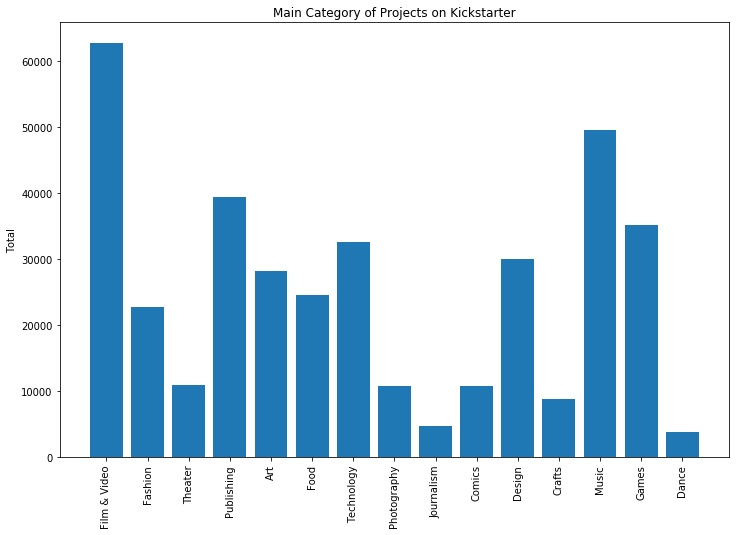

In [253]:
plt.figure(figsize=(12,8))
plt.bar(mc_cat, mc_val, align='center', alpha=1)
plt.ylabel('Total')
plt.xticks(rotation=90)
plt.title('Main Category of Projects on Kickstarter')
plt.show()

In [254]:
country=data['country']

In [255]:
countries=pd.read_csv('countries.csv',encoding="utf8")
ini_country=list(countries['country'])
lat=list(countries['latitude'])
lon=list(countries['longitude'])
count_lat=[]
count_lon=[]
for i in list(set(country)):
    if( i in ini_country):
        count_lat.append(lat[ini_country.index(i)])
        count_lon.append(lon[ini_country.index(i)])




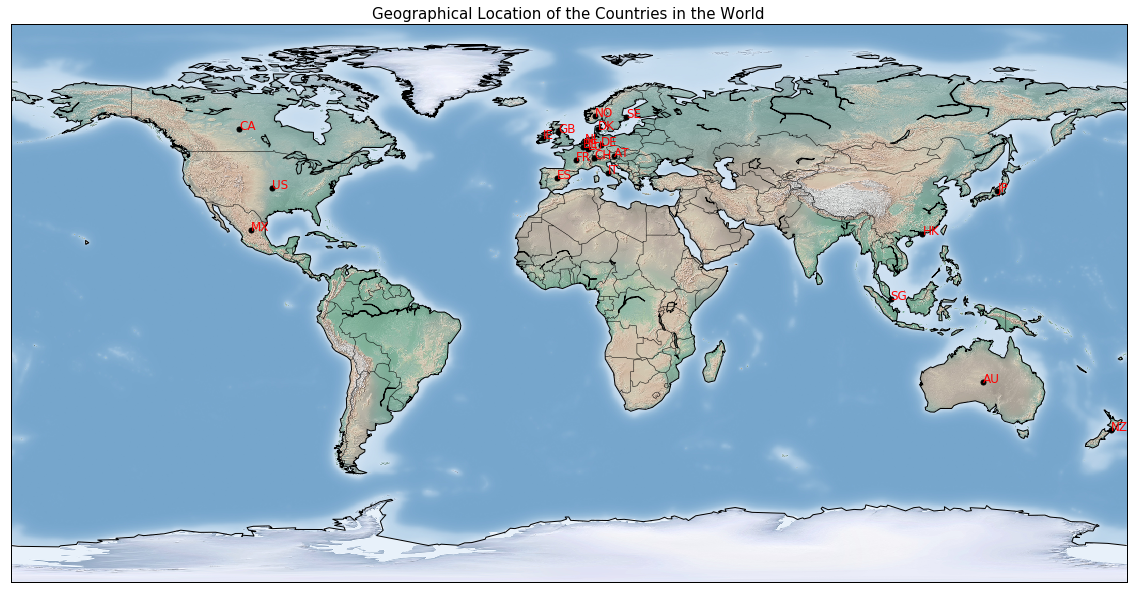

In [256]:
fig = plt.figure(figsize=(20, 14), edgecolor='w')
m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,)
m.shadedrelief(scale=0.2)
m.drawmapboundary(fill_color='#FFFFFF')
m.drawcountries()
m.drawcoastlines()
for i in range(0,len(count_lat)):
    x, y = m(count_lon[i],count_lat[i])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, list(set(country))[i], fontsize=12,color='red');
plt.title('Geographical Location of the Countries in the World',fontsize=15)
fig.savefig('worldmap.png')

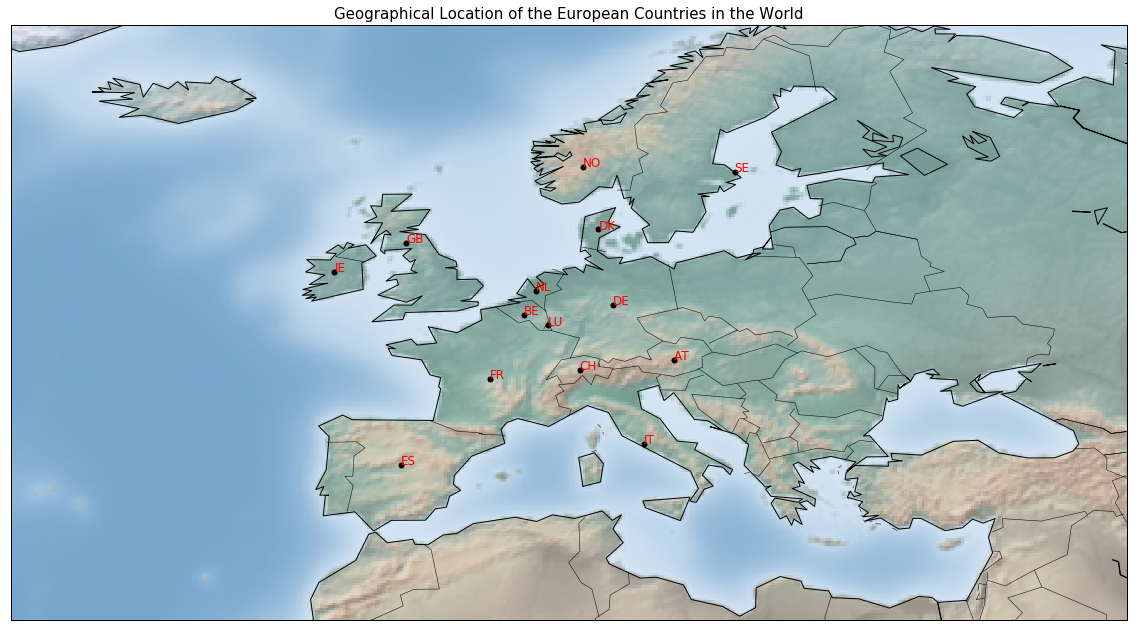

In [257]:
fig2 = plt.figure(figsize=(20, 14), edgecolor='w')
eu = Basemap(projection='cyl', resolution='c',
            llcrnrlat=30, urcrnrlat=70,
            llcrnrlon=-30, urcrnrlon=45,)
eu.shadedrelief(scale=0.2)
eu.drawmapboundary(fill_color='#FFFFFF')
eu.drawcountries()
eu.drawcoastlines()
for i in range(0,len(count_lat)):
    x, y = eu(count_lon[i],count_lat[i])
    if(x>-30 and x<45):                   #Just to zoom and Plot European countries
        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, list(set(country))[i], fontsize=12,color='red');
plt.title('Geographical Location of the European Countries in the World',fontsize=15)
fig2.savefig('European.png')

In [258]:
country_dict={}
for i in country:
    if i in country_dict:
        country_dict[i]+=1
    else:
        country_dict[i]=1

val=[]
labels=[]
explode=[]
for key in country_dict:
    labels.append(key)
    val.append(country_dict[key])
    if key == 'US':
        explode.append(0.2)
    else:
        explode.append(0.5)

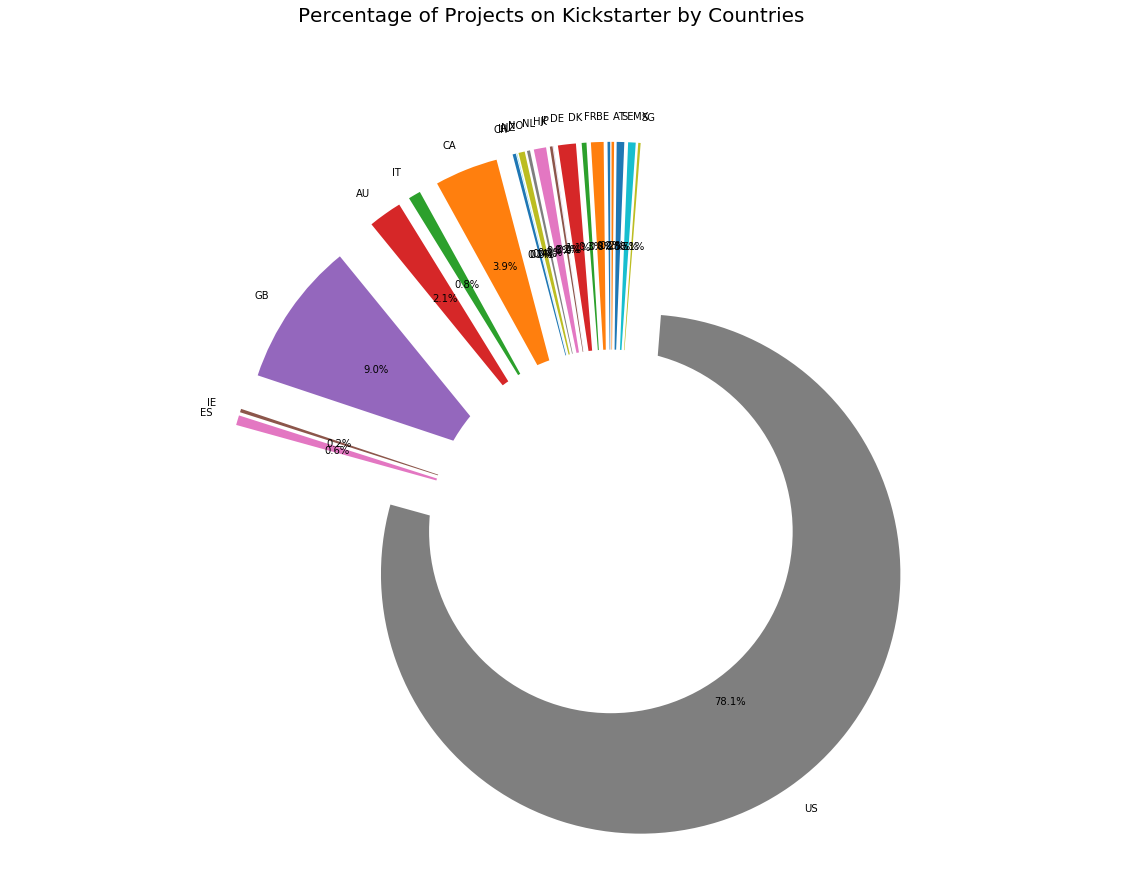

In [259]:
fig3 = plt.figure(figsize=(20, 14), edgecolor='w')
plt.pie(val,explode=explode,labels=labels,autopct='%1.1f%%', shadow=False, startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig3 = plt.gcf()
fig3.gca().add_artist(centre_circle)
plt.axis('equal')
fig3.suptitle('Percentage of Projects on Kickstarter by Countries',fontsize='20')
plt.show()

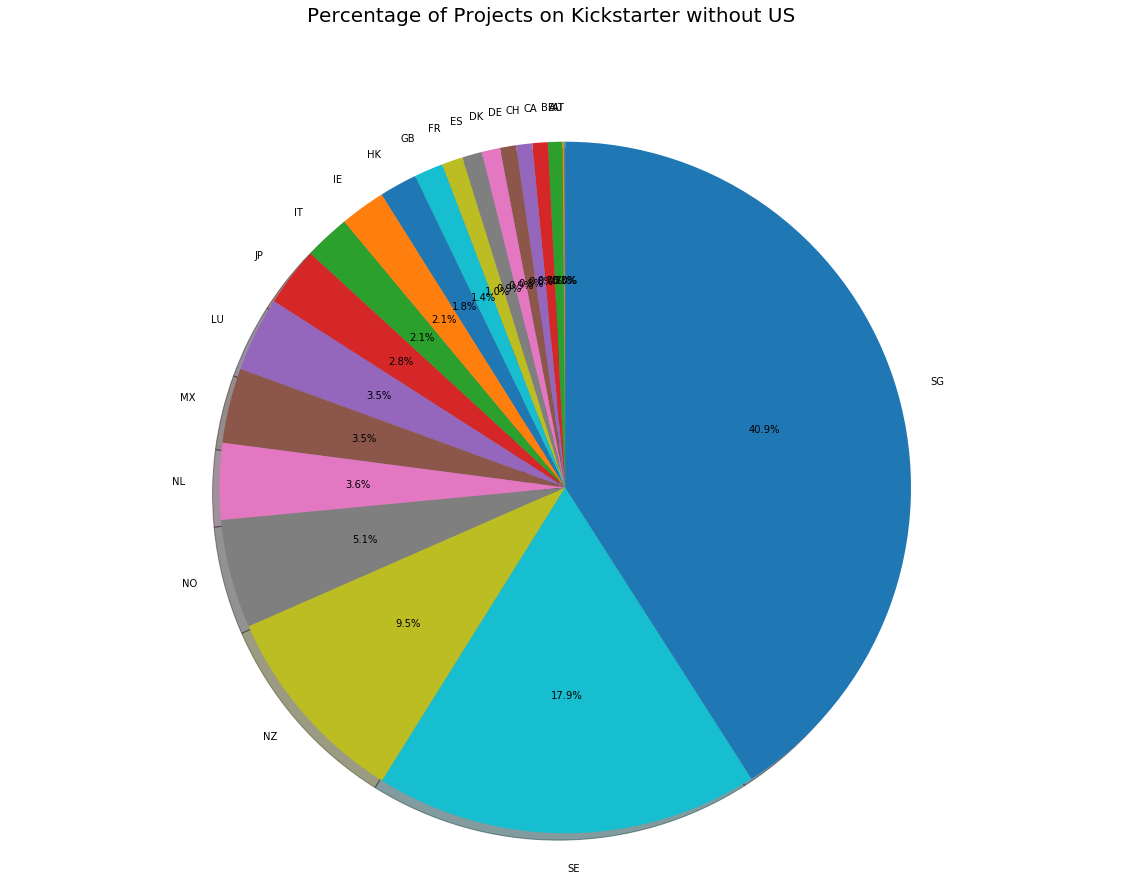

In [260]:
#Uncomment following lines to visualize without US
#val=sorted(val)
#labels=sorted(labels)
#val=val[:-1]
#labels=labels[:-1]

fig4 = plt.figure(figsize=(20, 14), edgecolor='w')
plt.pie(val,labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
fig4.suptitle('Percentage of Projects on Kickstarter without US',fontsize='20')
plt.show()

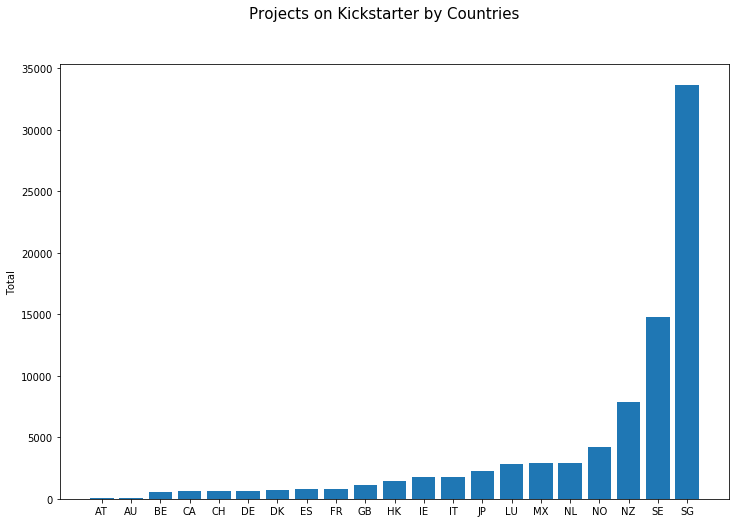

In [261]:
colors = 'rgbmkyc'
plt.figure(figsize=(12,8))
plt.bar(sorted(labels), sorted(val), align='center', alpha=1)
plt.ylabel('Total')
plt.xticks(rotation=360)
plt.suptitle('Projects on Kickstarter by Countries',fontsize='15')
plt.show()

In [262]:
state=data['state']
state_dict={}

In [263]:
for i in state:
    if i in state_dict:
        state_dict[i]+=1
    else:
        state_dict[i]=1

In [264]:
state_dict

{u'canceled': 38757,
 u'failed': 197611,
 u'live': 2798,
 u'successful': 133851,
 u'suspended': 1843}

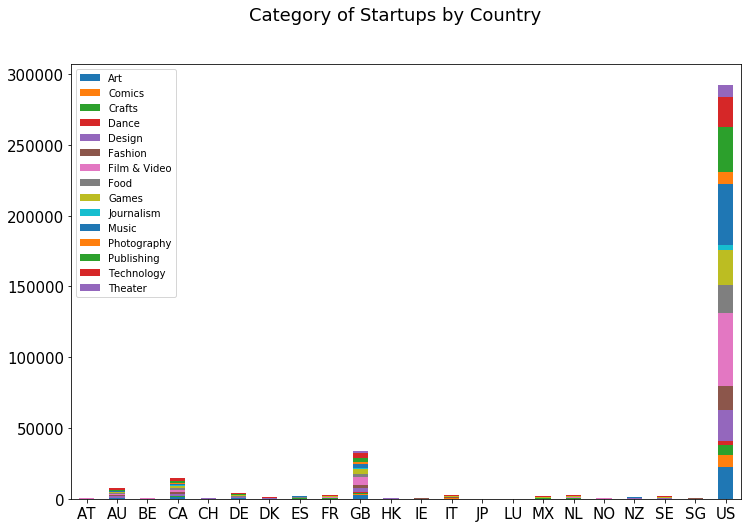

In [265]:
count_cat=[]
for i in zip(main_category,state,country):
    count_cat.append(i)

catcount={}
for j in count_cat:
    if j[0] not in catcount:
        catcount[j[0]]={}
        for k in count_cat:
            if k[2] not in catcount[j[0]]:
                catcount[j[0]][k[2]]=0
                
for k in count_cat:
    if(k[0] in catcount):
        if(k[2] in catcount[k[0]]):
            catcount[k[0]][k[2]]+=1

country_category = pd.DataFrame(catcount)
country_category.plot(kind="bar", stacked=True,fontsize='15',figsize=(12,8),rot=360)
plt.suptitle('Category of Startups by Country',fontsize='18')
plt.show()

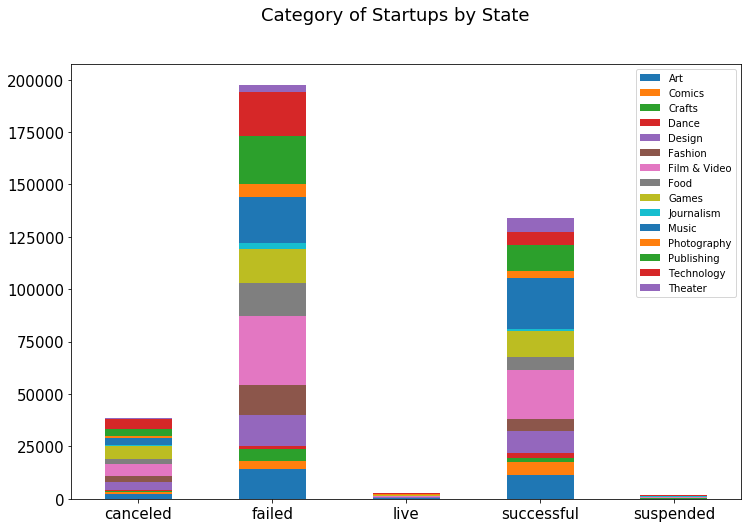

In [266]:
catstate={}
for j in count_cat:
    if j[0] not in catstate:
        catstate[j[0]]={}
        for k in count_cat:
            if k[1] not in catstate[j[0]]:
                catstate[j[0]][k[1]]=0

for k in count_cat:
    if(k[0] in catstate):
        if(k[1] in catstate[k[0]]):
            catstate[k[0]][k[1]]+=1

category_state = pd.DataFrame(catstate)
category_state.plot(kind="bar", stacked=True,fontsize='15',figsize=(12,8),rot=360)
plt.suptitle('Category of Startups by State',fontsize='18')
plt.show()

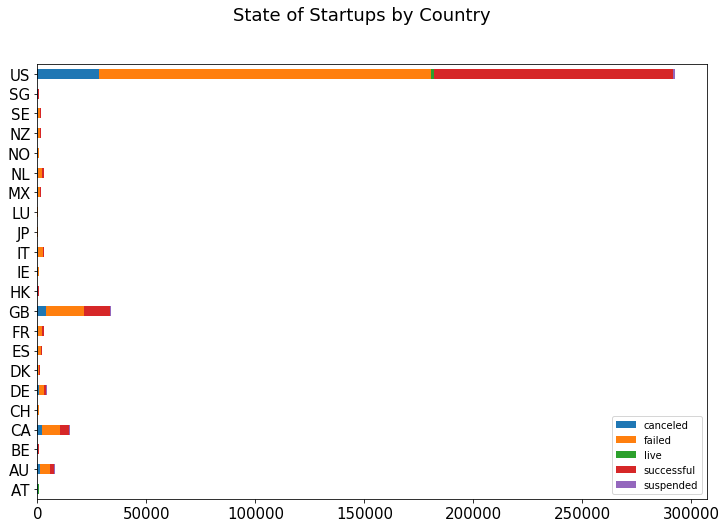

In [267]:
statecount={}
for j in count_cat:
    if j[1] not in statecount:
        statecount[j[1]]={}
        for k in count_cat:
            if k[2] not in statecount[j[1]]:
                statecount[j[1]][k[2]]=0

for k in count_cat:
    if(k[1] in statecount):
        if(k[2] in statecount[k[1]]):
            statecount[k[1]][k[2]]+=1

state_count = pd.DataFrame(statecount)
state_count.plot(kind="barh", stacked=True,fontsize='15',figsize=(12,8),rot=360)
plt.suptitle('State of Startups by Country',fontsize='18')
plt.show()

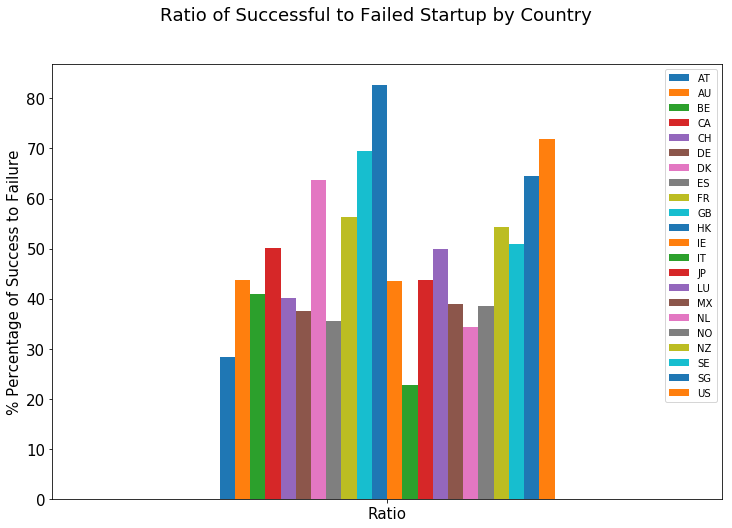

In [268]:
succtofail={}
for j in count_cat:
    if j[2] not in succtofail:
        succtofail[j[2]]={}
        for k in count_cat:
            if k[1] not in succtofail[j[2]]:
                if(k[1] =='successful' or k[1] == 'failed'):
                    succtofail[j[2]][k[1]]=0

for k in count_cat:
    if(k[2] in succtofail):
        if(k[1] in succtofail[k[2]]):
            succtofail[k[2]][k[1]]+=1
            
            
for i in succtofail:
    succtofail[i]['Ratio']=(succtofail[i]['successful']/succtofail[i]['failed']*100)
    del succtofail[i]['successful']
    del succtofail[i]['failed']
    
ratio = pd.DataFrame(succtofail)
ratio.plot(kind="bar", stacked=False,fontsize='15',figsize=(12,8),rot=360)
plt.ylabel('% Percentage of Success to Failure',fontsize=15)
plt.suptitle('Ratio of Successful to Failed Startup by Country',fontsize='18')
plt.show()

In [269]:
time=data['deadline']

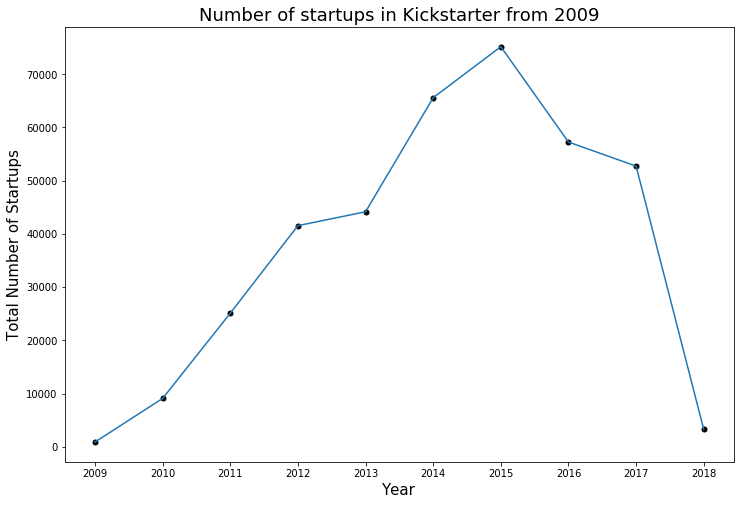

In [270]:
timecount={}
for i in time:
    i=i.split('-')
    if i[0] in timecount:
        timecount[i[0]]+=1
    else:
        timecount[i[0]]=1

year=[]
val_year=[]
for i in timecount:
    year.append(i)
    val_year.append(timecount[i])

lists = sorted(timecount.items())
x, y = zip(*lists)

plt.figure(figsize=(12,8))
plt.plot(x,y,'ok',markersize=5)
plt.plot(x,y)
plt.ylabel('Total Number of Startups',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.title('Number of startups in Kickstarter from 2009',fontsize=18)
plt.show()

In [271]:
data

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [297]:
trim_data=data[['main_category','launched','backers','country','usd_pledged_real','usd_goal_real','state']]

In [394]:
X=trim_data.iloc[:,0:6].values
Y=trim_data.iloc[:,6:].values

for i in range(len(Y)):
    if(Y[i] == 'successful'):
        Y[i]=1
    elif(Y[i] == 'failed'):
        Y[i]=0
    else:
        continue
for i in X:
    i[1]=int(i[1].split('-')[0])

    
from sklearn import preprocessing
main_cat=preprocessing.LabelEncoder()
minv=[]
for i in X[:,0]:
    minv.append(str(i))
m_t=main_cat.fit_transform(minv)
mi_t=main_cat.inverse_transform(m_t)
X[:,0]=main_cat.fit_transform(X[:,0])

maininv=set()
for i in zip(m_t,mi_t):
    maininv.add(i)

country_cat=preprocessing.LabelEncoder()
cinv=[]
for i in X[:,3]:
    cinv.append(str(i))
c_t=country_cat.fit_transform(inv)
ci_t=list(country_cat.inverse_transform(c_t))
X[:,3]=country_cat.fit_transform(X[:,3])

countryinv=set()
for i in zip(c_t,ci_t):
    countryinv.add(i)


In [397]:
countryinv

{(0, 'AT'),
 (1, 'AU'),
 (2, 'BE'),
 (3, 'CA'),
 (4, 'CH'),
 (5, 'DE'),
 (6, 'DK'),
 (7, 'ES'),
 (8, 'FR'),
 (9, 'GB'),
 (10, 'HK'),
 (11, 'IE'),
 (12, 'IT'),
 (13, 'JP'),
 (14, 'LU'),
 (15, 'MX'),
 (16, 'NL'),
 (17, 'NO'),
 (18, 'NZ'),
 (19, 'SE'),
 (20, 'SG'),
 (21, 'US')}

In [303]:
y_new=[]
x_new=[]
for i,x in enumerate(Y):
    if(x[0] == 1 or x[0] == 0):
        y_new.append(x)
        x_new.append(X[i])
    else:
        continue


In [309]:
from sklearn.model_selection import train_test_split
import pickle
x_new=np.array(x_new)
y_new=np.array(y_new)
X_train,X_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.2,random_state=0)

In [318]:
model=xgb.XGBClassifier(seed=82)
success=model.fit(X_train,y_train)

X_test[0]

array([13, 2015, 1, 21, 30.0, 3000.0], dtype=object)

In [311]:
y_predict=model.predict(X_test)

In [312]:
y_predict=np.reshape(y_predict,(66293,1))
y_predict.shape

(66293, 1)

In [313]:
y_fin_test=[]
for i in y_test:
    y_fin_test.append(i[0])
y_fin_pred=[]
for i in y_predict:
    y_fin_pred.append(i[0])

In [314]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
conf_mat = confusion_matrix(y_fin_test, y_fin_pred)

In [315]:
conf_mat

array([[38994,   529],
       [    4, 26766]])

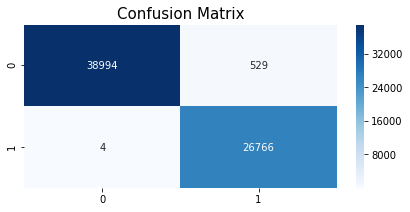

In [316]:
df_cm = pd.DataFrame(conf_mat, index = [0,1],
                  columns = [0,1])
plt.figure(figsize = (7,3))
plt.title('Confusion Matrix',fontsize=15)
sn.heatmap(df_cm, annot=True,cmap='Blues',fmt='g')



In [233]:
import cPickle
# save the classifier
with open('kickstarter_classifier.pkl', 'wb') as fid:
    cPickle.dump(model, fid) 